PART3- (Handling Outliers)

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline


plt.rcParams["figure.figsize"] = (10, 6)


sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [129]:
df = pd.read_csv("filled_scout.csv")


In [130]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [131]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [132]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [133]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [134]:
df.shape

(15919, 25)

In [135]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.00,80000.00,83450.00
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D..."


km

In [136]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6692
--------------------------------
10.00       1045
1647.36      985
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6692, dtype: int64


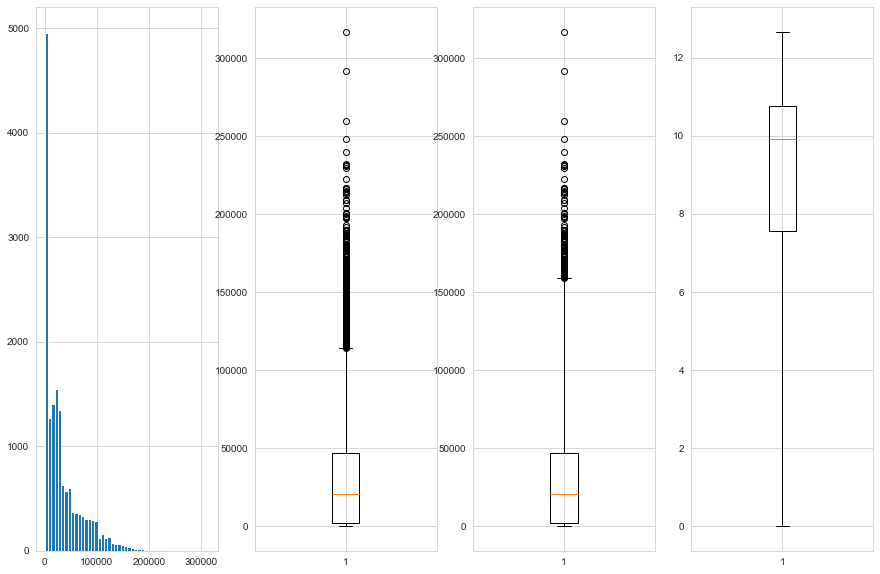

In [137]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)  #default u 1.5, 2.5 a transform uyguladik o yüzden log u uyguladik,sonrasinda outliers kalmadigini gördük
plt.show()                              #saga carpik 

Gears

In [138]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
--------------------------------
6.00     8615
5.00     4255
7.00     2810
8.00      225
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: Gears, dtype: int64


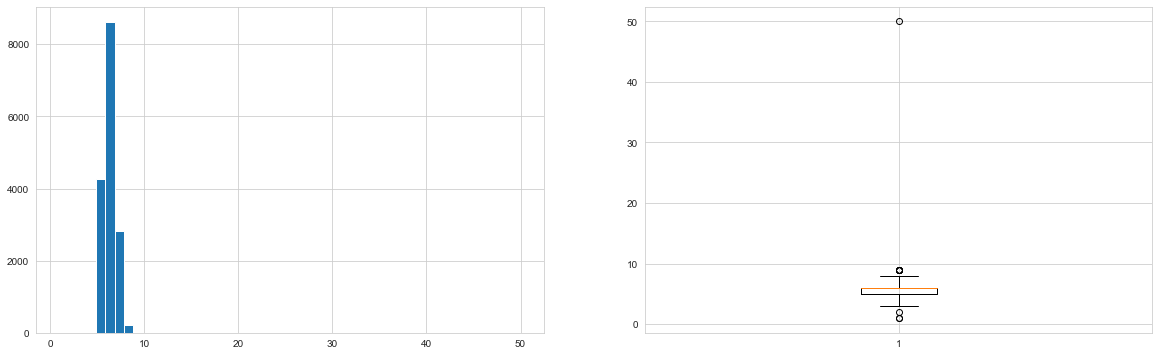

In [139]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=2.5)

plt.show()

In [140]:
df.Gears.describe()

count   15919.00
mean        5.94
std         0.79
min         1.00
25%         5.00
50%         6.00
75%         6.00
max        50.00
Name: Gears, dtype: float64

In [141]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

14495   50.00
15827    9.00
15824    9.00
15814    9.00
15869    9.00
15812    9.00
15876    9.00
12463    8.00
12470    8.00
12469    8.00
Name: Gears, dtype: float64

In [142]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

8921    1.00
14375   1.00
9812    2.00
15817   3.00
15845   3.00
15823   4.00
15822   4.00
10427   5.00
10428   5.00
10429   5.00
Name: Gears, dtype: float64

In [143]:
df[(df.Gears < 5) | (df.Gears > 8)][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
8921,Opel Corsa,Compact,Semi-automatic,1.00
9812,Opel Corsa,Sedans,Manual,2.00
14375,Renault Clio,Compact,Automatic,1.00
14495,Renault Clio,Sedans,Manual,50.00
15812,Renault Espace,Van,Automatic,9.00
15814,Renault Espace,Van,Automatic,9.00
15817,Renault Espace,Van,Automatic,3.00
15822,Renault Espace,Van,Automatic,4.00
15823,Renault Espace,Van,Automatic,4.00
15824,Renault Espace,Van,Automatic,9.00


In [144]:
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gearing_Type", "Gears"]]

,make_model,body_type,Gearing_Type,Gears
14928,Renault Espace,Van,Automatic,6.00
14929,Renault Espace,Station wagon,Automatic,6.00
14930,Renault Espace,Transporter,Automatic,6.00
14931,Renault Espace,Van,Automatic,6.00
14932,Renault Espace,Van,Automatic,6.00
...,...,...,...,...
15914,Renault Espace,Van,Automatic,6.00
15915,Renault Espace,Van,Automatic,7.00
15916,Renault Espace,Van,Automatic,6.00
15917,Renault Espace,Van,Automatic,6.00


In [145]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [146]:
df.Gears.isnull().sum()

14

In [147]:
fill(df, "make_model", "body_type", "Gears", "mode")

Number of NaN :  0
------------------
6.00    8625
5.00    4259
7.00    2810
8.00     225
Name: Gears, dtype: int64


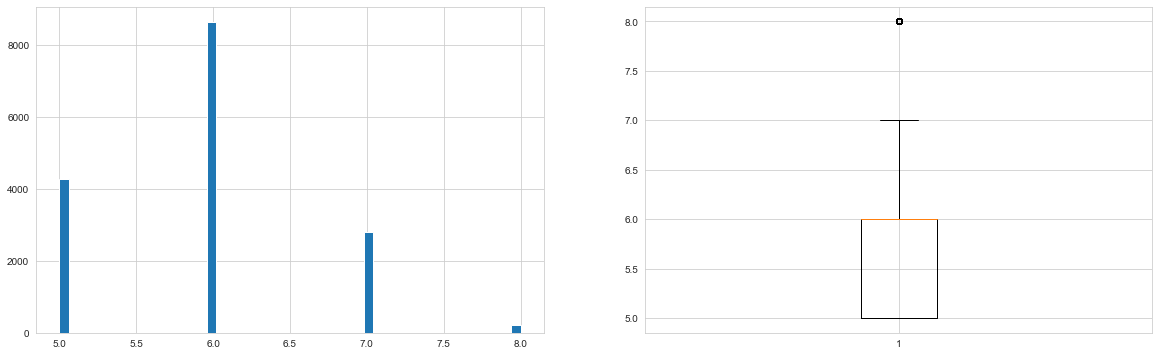

In [148]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Gears, bins=50)

plt.subplot(122)
plt.boxplot(df.Gears, whis=1.5)

plt.show()

cons_comb

In [149]:
df.cons_comb.describe()

count   15919.00
mean        4.83
std         0.87
min         3.00
25%         4.10
50%         4.80
75%         5.40
max         9.10
Name: cons_comb, dtype: float64

In [150]:
df.cons_comb.sort_values().head(10)

6440    3.00
2863    3.00
2862    3.00
13493   3.00
13482   3.00
11004   3.00
11015   3.00
11044   3.00
811     3.00
6240    3.00
Name: cons_comb, dtype: float64

In [151]:
df.cons_comb.sort_values().tail(10)

3601    8.30
3649    8.30
10789   8.60
12553   8.60
12530   8.60
12422   8.60
10817   8.70
12054   8.70
12529   8.70
10771   9.10
Name: cons_comb, dtype: float64

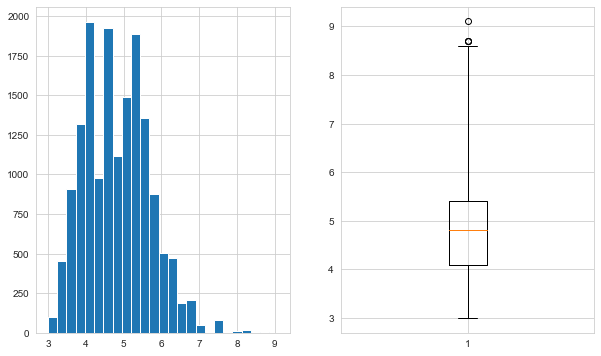

In [152]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2.5)

plt.show()

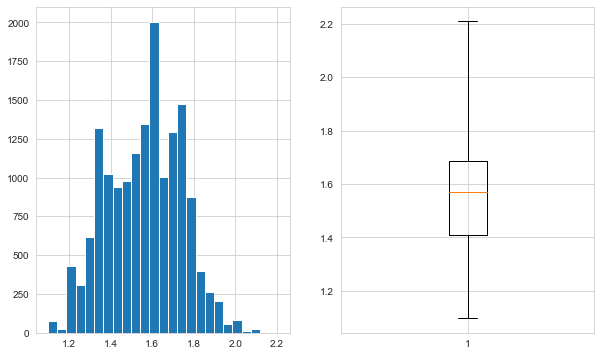

In [153]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(np.log(df.cons_comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.cons_comb), whis = 2)

plt.show()

Displacement_cc

In [154]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.00     5044
999.00      2467
1398.00     1387
1399.00      768
1229.00      678
1956.00      670
1461.00      667
1490.00      559
1422.00      467
1197.00      372
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
89

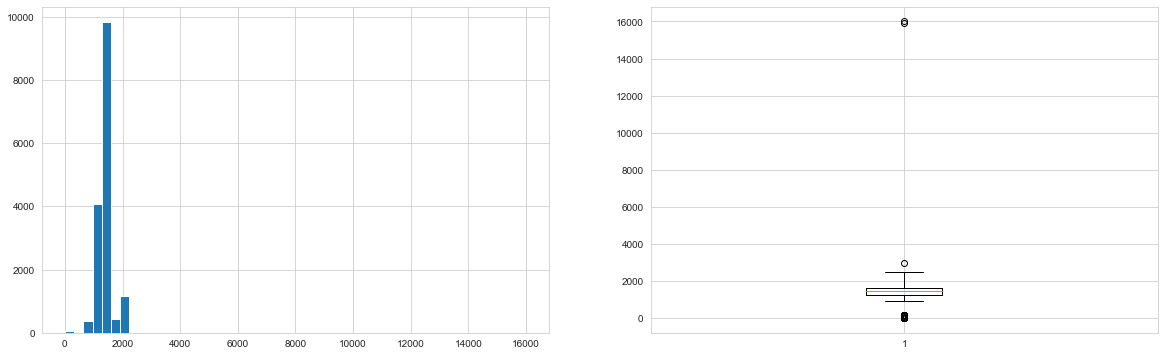

In [155]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Displacement_cc, bins=50)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)

plt.show()

In [156]:
df.Displacement_cc.describe()

count   15919.00
mean     1425.61
std       329.72
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement_cc, dtype: float64

In [157]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10932   16000.00
7169    15898.00
10771    2967.00
3595     2480.00
3587     2480.00
Name: Displacement_cc, dtype: float64

In [158]:
df.sort_values(by = ["Displacement_cc"], ascending = False)["Displacement_cc"].head(55)

10932   16000.00
7169    15898.00
10771    2967.00
3595     2480.00
3587     2480.00
3649     2480.00
3590     2480.00
3599     2480.00
3598     2480.00
3596     2480.00
3600     2480.00
3601     2480.00
3610     2480.00
3609     2480.00
3608     2480.00
3606     2480.00
3605     2480.00
3648     2480.00
3592     2480.00
3593     2480.00
3602     2480.00
3604     2480.00
3603     2480.00
12176    2000.00
12462    2000.00
12521    2000.00
12170    2000.00
13027    2000.00
11929    2000.00
12179    2000.00
11935    2000.00
12181    2000.00
11800    2000.00
4188     2000.00
12526    2000.00
12959    2000.00
12527    2000.00
11977    2000.00
12469    2000.00
12520    2000.00
12464    2000.00
12265    2000.00
11870    2000.00
10556    2000.00
2903     2000.00
15197    2000.00
12414    2000.00
11988    2000.00
13050    2000.00
12412    2000.00
10464    2000.00
12560    2000.00
12411    2000.00
11032    2000.00
13054    2000.00
Name: Displacement_cc, dtype: float64

In [159]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [160]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [161]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [162]:
df.Displacement_cc.isnull().sum()

53

In [163]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.00    5077
999.00     2467
1398.00    1388
1399.00     772
1461.00     682
1229.00     678
1956.00     670
1490.00     559
1422.00     467
1197.00     372
898.00      351
1395.00     320
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     130
1248.00     110
1997.00     103
1364.00     102
1400.00      90
998.00       72
1500.00      50
2000.00      46
1000.00      40
1998.00      25
2480.00      20
1984.00      18
1200.00      18
1397.00      11
899.00       11
929.00        5
1499.00       5
997.00        4
900.00        4
1596.00       4
1599.00       3
1396.00       3
1199.00       3
1589.00       2
1300.00       2
1495.00       2
995.00        2
890.00        1
1333.00       1
1580.00       1
1995.00       1
1533.00       1
1100.00       1
1198.00       1
1496.00       1
1368.00       1
1896.00       1
1584.00       1
1568.00       1
996.00        1
1696.00       1
1686.00       1
973.00        1
18

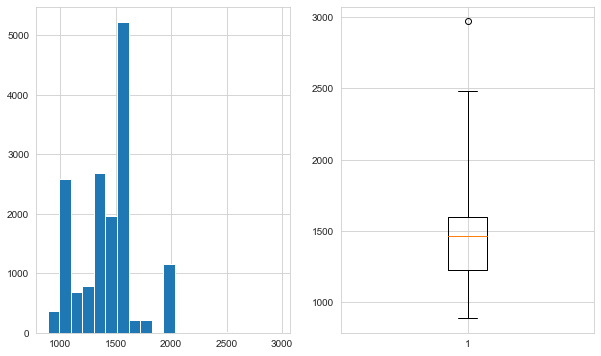

In [164]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

Nr_of_Doors

In [165]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.00    11787
4.00     3079
3.00      832
2.00      219
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64


In [166]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [167]:
df.Nr_of_Doors.isnull().sum()

2

In [168]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.00    11789
4.00     3079
3.00      832
2.00      219
Name: Nr_of_Doors, dtype: int64


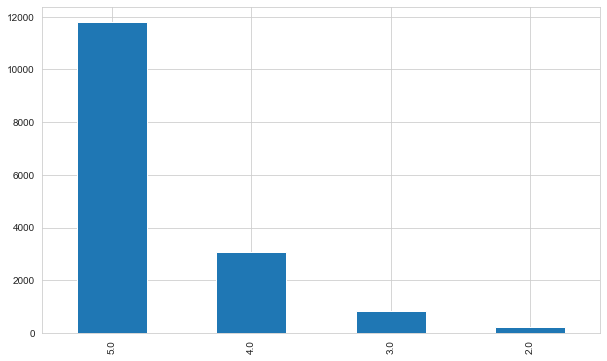

In [169]:
df.Nr_of_Doors.value_counts(dropna = False).plot.bar();

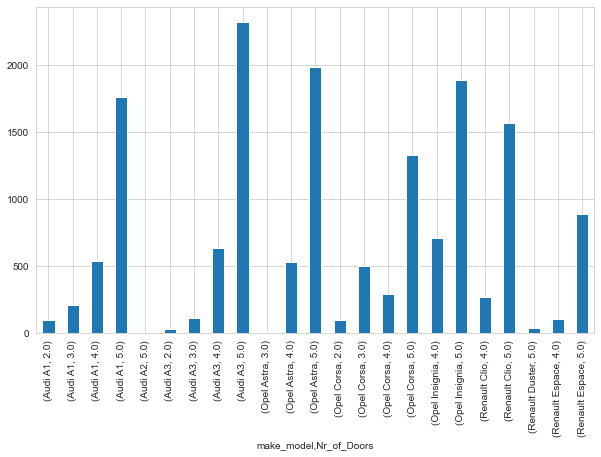

In [170]:
df.groupby(["make_model", "Nr_of_Doors"]).Nr_of_Doors.count().plot.bar();

In [171]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

Nr_of_Seats

In [172]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14308
4.00     1127
7.00      362
2.00      119
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64

In [173]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [174]:
df.Nr_of_Seats.value_counts(dropna = False)

5.00    14308
4.00     1127
7.00      362
2.00      119
NaN         3
Name: Nr_of_Seats, dtype: int64

In [175]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.00    14311
4.00     1127
7.00      362
2.00      119
Name: Nr_of_Seats, dtype: int64


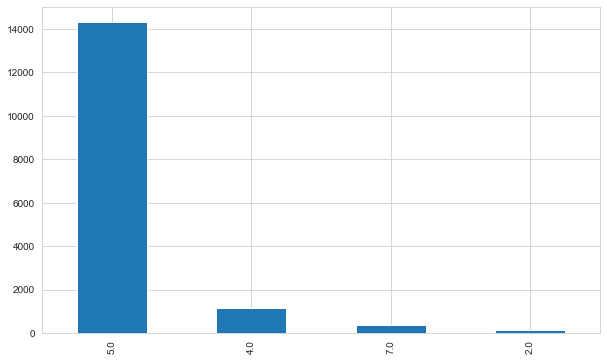

In [176]:
df.Nr_of_Seats.value_counts(dropna = False).plot.bar();

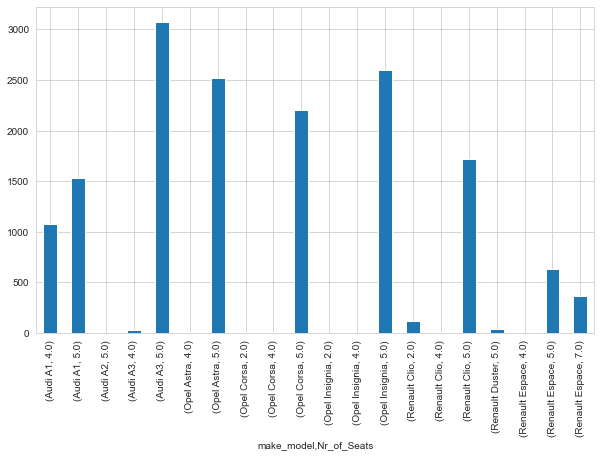

In [177]:
df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar();

In [178]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

Weight_kg

In [179]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.00    1582
1360.00    1419
1487.00     966
1135.00     837
1425.00     744
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: Weight_kg, Length: 434, dtype: int64


In [180]:
df.Weight_kg.describe()

count   15919.00
mean     1337.43
std       200.47
min         1.00
25%      1165.00
50%      1295.00
75%      1472.00
max      2471.00
Name: Weight_kg, dtype: float64

In [181]:
df["Weight_kg"].sort_values().head(10)

8355      1.00
12779     1.00
1143    102.00
8857    840.00
14313   900.00
13513   977.00
13555   977.00
14654   980.00
14105   980.00
13999   980.00
Name: Weight_kg, dtype: float64

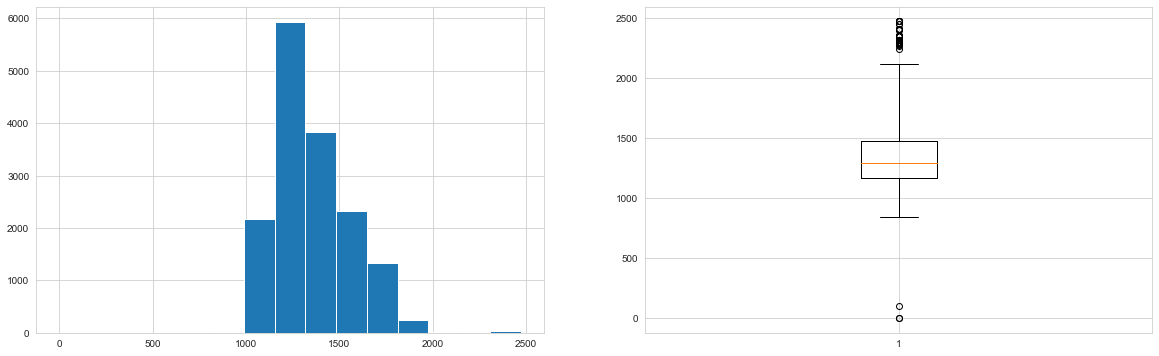

In [182]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

In [183]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [184]:
df["Weight_kg"].isnull().sum()

3

In [185]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.00    1583
1360.00    1419
1487.00     967
1135.00     837
1425.00     744
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: Weight_kg, Length: 432, dtype: int64


In [186]:
df["Weight_kg"].isnull().sum()

0

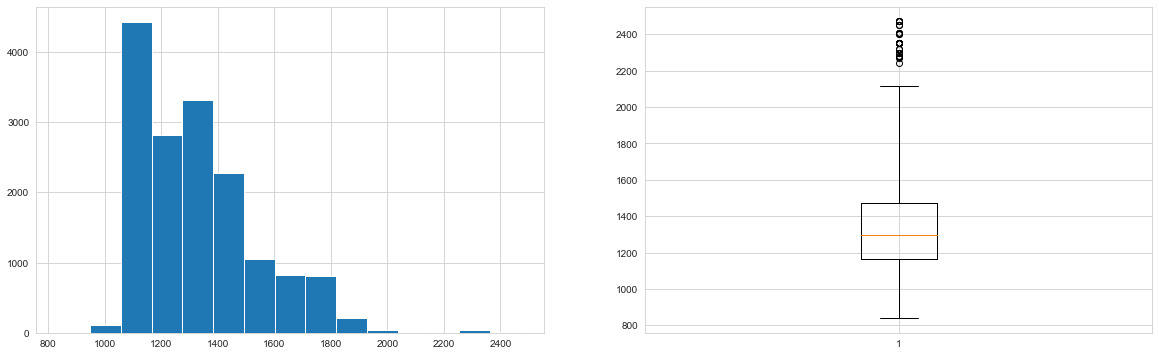

In [187]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

hp_kW

In [188]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.00     2543
66.00     2124
81.00     1403
100.00    1314
110.00    1113
70.00      890
125.00     711
51.00      696
55.00      589
118.00     550
92.00      466
121.00     392
147.00     380
77.00      353
56.00      294
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
120.00       8
104.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
65.00        4
90.00        4
76.00        4
168.00       3
98.00        3
149.00       3
80.00        3
93.00        3
167.00       2
228.0

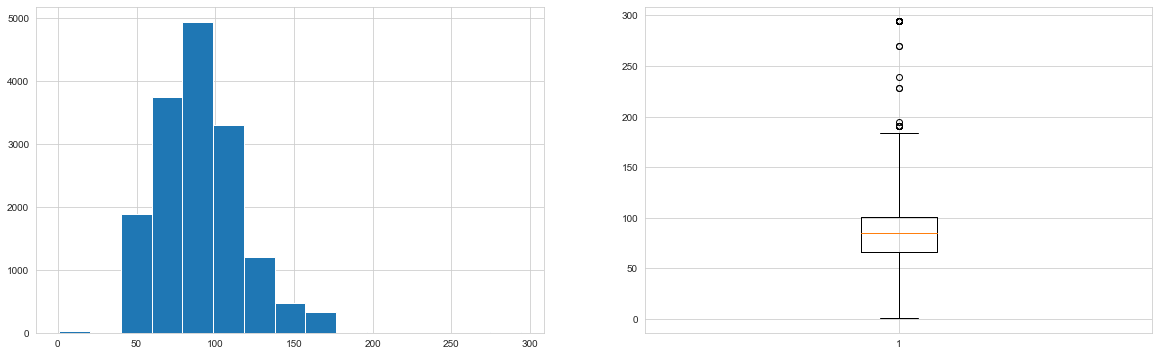

In [189]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

In [190]:
df.hp_kW.describe()

count   15919.00
mean       88.37
std        26.84
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp_kW, dtype: float64

In [191]:
df.hp_kW.sort_values().head(50)

6034     1.00
6946     1.00
7014     1.00
9285     1.00
9287     1.00
6005     1.00
9288     1.00
7018     1.00
9289     1.00
9290     1.00
9292     1.00
9299     1.00
10610    1.00
10580    1.00
10579    1.00
10468    1.00
15155    1.00
15156    1.00
7019     1.00
7016     1.00
13885    4.00
3913     9.00
8857    40.00
13759   40.00
8408    44.00
10282   51.00
10283   51.00
10284   51.00
10285   51.00
10286   51.00
10287   51.00
9145    51.00
10288   51.00
10346   51.00
10281   51.00
10330   51.00
9026    51.00
9025    51.00
10342   51.00
10289   51.00
9159    51.00
9384    51.00
9158    51.00
10290   51.00
10291   51.00
10345   51.00
10280   51.00
10279   51.00
10278   51.00
10264   51.00
Name: hp_kW, dtype: float64

In [192]:
np.sort(df.hp_kW.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

In [193]:
df.hp_kW.loc[df.hp_kW < 51] = np.nan

In [194]:
df.hp_kW.isnull().sum()

25

In [195]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.00     2544
66.00     2126
81.00     1403
100.00    1317
110.00    1117
70.00      890
125.00     715
51.00      703
55.00      589
118.00     552
92.00      466
121.00     392
147.00     380
77.00      353
56.00      296
54.00      276
103.00     253
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
80.00        3
93.00        3
168.00       3
149.00       3
98.00        3
150.00       2
228.00       2
53.00        2
270.00       2
86.00        2
167.00       2
63.00        2
127.00       2
89.00        2
143.00       2
14

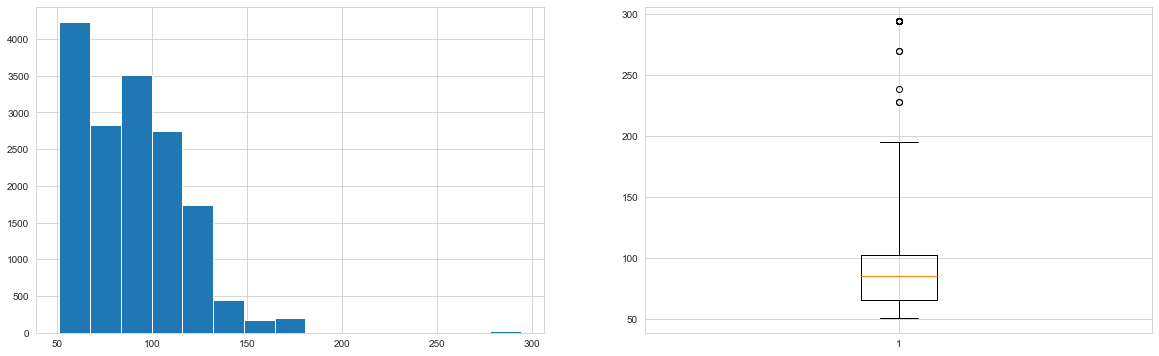

In [196]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

CO2_Emission

In [197]:
first_looking("CO2_Emission")

column name    :  CO2_Emission
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  124
--------------------------------
120.00      1000
104.00       782
97.00        631
99.00        593
124.00       574
102.00       501
85.00        456
103.00       445
128.00       425
106.00       418
105.00       401
117.00       394
114.00       390
119.00       381
107.00       379
137.00       376
108.00       362
129.00       356
126.00       353
118.00       270
110.00       266
127.00       257
135.00       252
113.00       237
111.00       237
109.00       234
139.00       224
140.00       218
141.00       214
92.00        198
123.00       189
130.00       180
150.00       174
112.00       171
143.00       171
95.00        161
116.00       157
98.00        156
131.00       151
153.00       149
101.00       147
136.00       145
133.00       145
125.00       133
134.00       130
145.00       126
149.00       117
147.00       109
132.00       100
115.

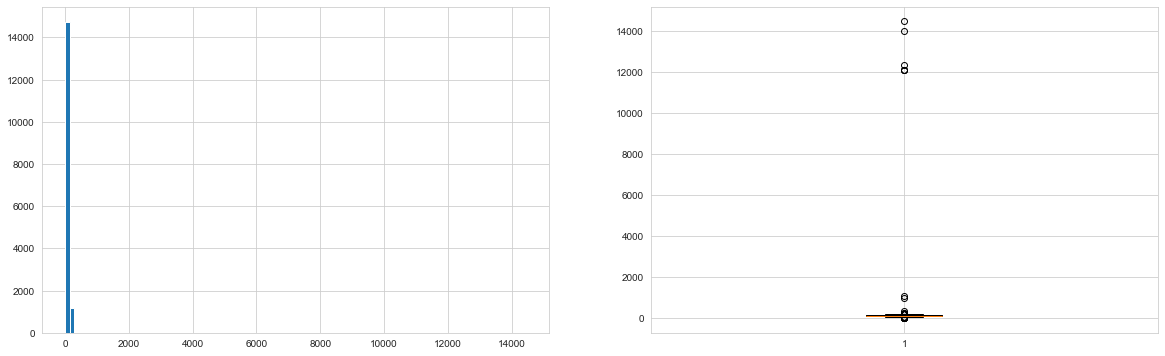

In [198]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=100)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

In [199]:
df.CO2_Emission.describe()

count   15919.00
mean      122.62
std       248.53
min         0.00
25%       104.00
50%       117.00
75%       129.00
max     14457.00
Name: CO2_Emission, dtype: float64

In [200]:
df.CO2_Emission.value_counts().sort_index()

0.00           2
1.00           1
5.00           3
14.00          1
36.00          5
45.00          1
51.00          1
80.00          1
82.00         25
84.00          2
85.00        456
87.00          6
88.00         15
89.00         19
90.00         35
91.00         31
92.00        198
93.00         66
94.00         42
95.00        161
96.00         22
97.00        631
98.00        156
99.00        593
100.00        55
101.00       147
102.00       501
103.00       445
104.00       782
105.00       401
106.00       418
107.00       379
108.00       362
109.00       234
110.00       266
111.00       237
112.00       171
113.00       237
114.00       390
115.00        86
116.00       157
117.00       394
118.00       270
119.00       381
120.00      1000
121.00        82
122.00        84
123.00       189
124.00       574
125.00       133
126.00       353
127.00       257
128.00       425
129.00       356
130.00       180
131.00       151
132.00       100
133.00       145
134.00       1

In [201]:
df.groupby(["make_model", "body_type", "CO2_Emission"]).price.describe()

count     mean     std      min  \
make_model     body_type CO2_Emission                                    
Audi A1        Compact   90.00          1.00 12880.00     NaN 12880.00   
                         91.00          5.00 13038.00 1108.93 11800.00   
                         92.00          1.00 12479.00     NaN 12479.00   
                         94.00          5.00 13960.00 1232.07 12900.00   
                         97.00        113.00 15449.59 2445.75 10900.00   
...                                      ...      ...     ...      ...   
Renault Espace Van       175.00         6.00 36931.67 2811.67 33781.00   
                         188.00         1.00 43080.00     NaN 43080.00   
                         191.00         2.00 28465.00    0.00 28465.00   
                         193.00         1.00 38990.00     NaN 38990.00   
                         194.00         1.00 46490.00     NaN 46490.00   

                                           25%      50%      75%      max  
make_model     body_type CO2_Emission                                      
Audi A1        Compact   90.00        12880.00 12880.00 12880.00 12880.00  
                         91.00        11850.00 13800.00 13800.00 13940.00  
                         92.00        12479.00 12479.00 12479.00 12479.00  
                         94.00        12900.00 13900.00 14200.00 15900.00  
                         97.00        13770.00 15400.00 16700.00 23500.00  
...                                        ...      ...      ...      ...  
Renault Espace Van       175.00       35630.00 35830.00 38286.75 41480.00  
                         188.00       43080.00 43080.00 43080.00 43080.00  
                         191.00       28465.00 28465.00 28465.00 28465.00  
                         193.00       38990.00 38990.00 38990.00 38990.00  
                         194.00       46490.00 46490.00 46490.00 46490.00  

[733 rows x 8 columns]

In [202]:
cond = ((df.CO2_Emission < 36) | (df.CO2_Emission > 330))

df.loc[cond, "CO2_Emission"] = np.nan

In [203]:
df.CO2_Emission.isnull().sum()

16

In [204]:
fill(df, "make_model", "body_type", "CO2_Emission", "median")

Number of NaN :  0
------------------
120.00    1000
104.00     782
97.00      631
99.00      593
124.00     574
102.00     501
85.00      456
103.00     445
128.00     425
106.00     420
105.00     402
117.00     394
114.00     390
119.00     384
107.00     379
137.00     376
108.00     362
129.00     357
126.00     353
118.00     270
110.00     266
127.00     257
135.00     252
113.00     237
111.00     237
109.00     234
139.00     224
140.00     218
141.00     214
92.00      198
123.00     189
130.00     180
150.00     174
112.00     171
143.00     171
95.00      161
116.00     157
98.00      156
131.00     152
153.00     149
101.00     147
136.00     145
133.00     145
125.00     133
134.00     130
145.00     126
149.00     117
147.00     109
132.00     100
115.00      86
122.00      84
121.00      82
138.00      79
93.00       66
168.00      58
142.00      58
100.00      55
148.00      48
94.00       42
154.00      40
144.00      40
146.00      36
90.00       35
151.00      34
18

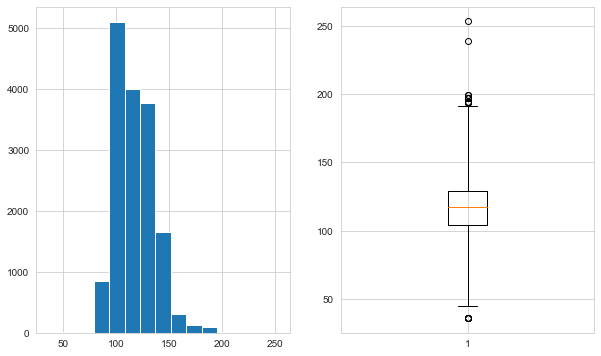

In [205]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.hist(df.CO2_Emission, bins=15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis=2.5)

plt.show()

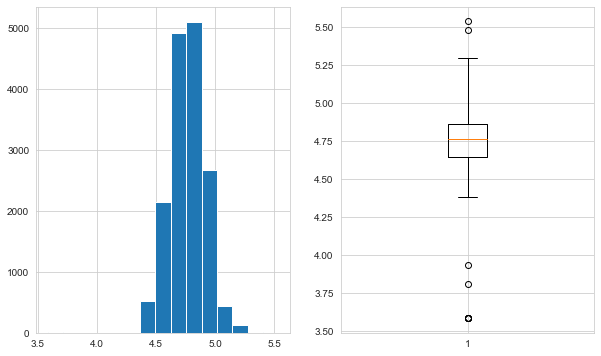

In [206]:
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.hist(np.log(df.CO2_Emission), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_Emission), whis=2.5)

plt.show()

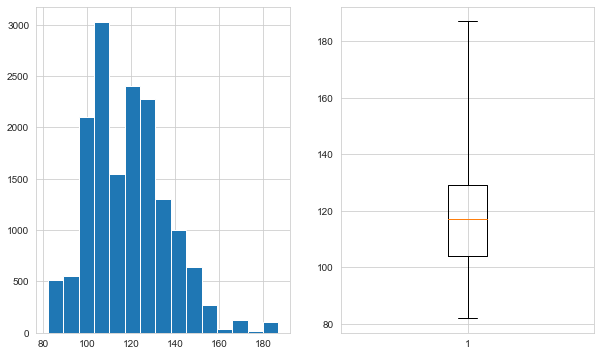

In [207]:
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.hist(winsorize(df.CO2_Emission, (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df.CO2_Emission, (0.001, 0.003)), whis=2.5) #winsorize de alt limit ve üst limit su olsun diyip ona yaklastir diyoruz

plt.show()

cons_comb

In [208]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  62
--------------------------------
4.00    1020
5.60     965
5.40     900
5.00     810
4.70     766
3.90     733
4.50     731
4.40     668
5.10     657
3.80     585
4.80     580
4.20     579
4.90     535
5.30     530
5.20     454
4.60     426
5.50     389
5.90     369
3.70     369
4.10     362
5.70     342
6.00     331
3.30     307
4.30     307
3.50     288
3.60     231
6.20     219
6.30     181
6.10     175
5.80     165
6.60     148
6.80     136
3.40     125
6.40      75
3.00      69
7.40      66
6.50      43
6.70      43
7.10      38
6.90      27
3.20      25
8.30      20
3.65      20
3.45      19
5.15      19
7.60      14
7.00      10
3.10       7
7.80       6
7.20       6
8.00       5
8.60       4
3.95       3
7.90       3
8.70       3
7.30       2
8.10       2
5.45       2
4.55       2
9.10       1
4.30       1
7.50       1
Name: cons_comb, dtype: int64


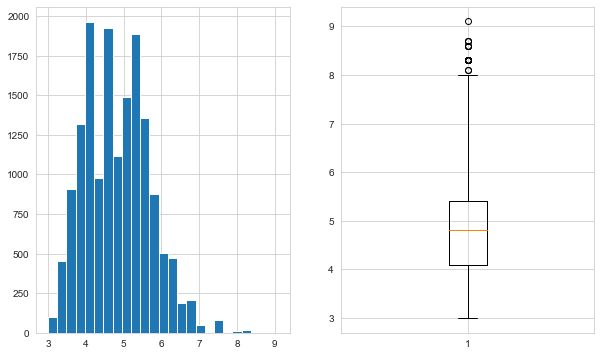

In [209]:
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2)

plt.show()

In [210]:
df.cons_comb.describe()

count   15919.00
mean        4.83
std         0.87
min         3.00
25%         4.10
50%         4.80
75%         5.40
max         9.10
Name: cons_comb, dtype: float64

In [211]:
df.cons_comb.sort_values().head(10)

6440    3.00
2863    3.00
2862    3.00
13493   3.00
13482   3.00
11004   3.00
11015   3.00
11044   3.00
811     3.00
6240    3.00
Name: cons_comb, dtype: float64

In [212]:
df.cons_comb.sort_values().tail(10)

3601    8.30
3649    8.30
10789   8.60
12553   8.60
12530   8.60
12422   8.60
10817   8.70
12054   8.70
12529   8.70
10771   9.10
Name: cons_comb, dtype: float64

price

In [213]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


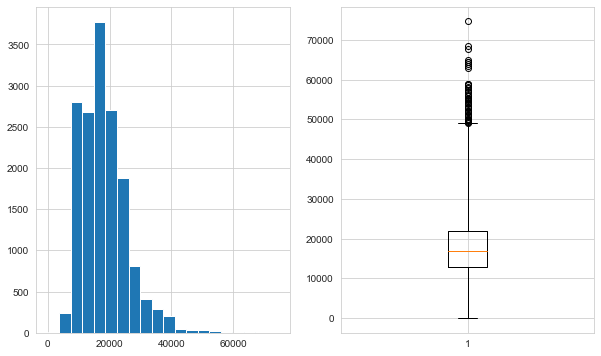

In [214]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [215]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [216]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [217]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [218]:
df.drop(drop_index, axis=0, inplace=True)

In [219]:
df.shape

(15915, 23)

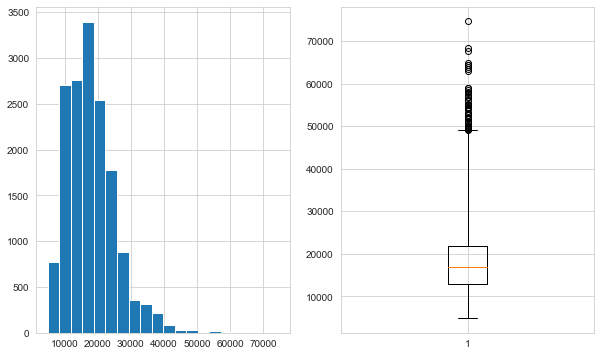

In [220]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

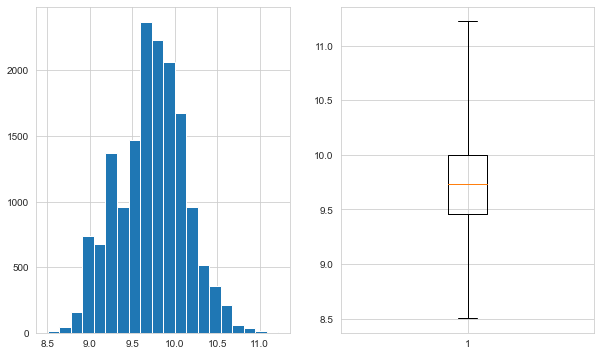

In [221]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.price), bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.price), whis=2.3)

plt.show()

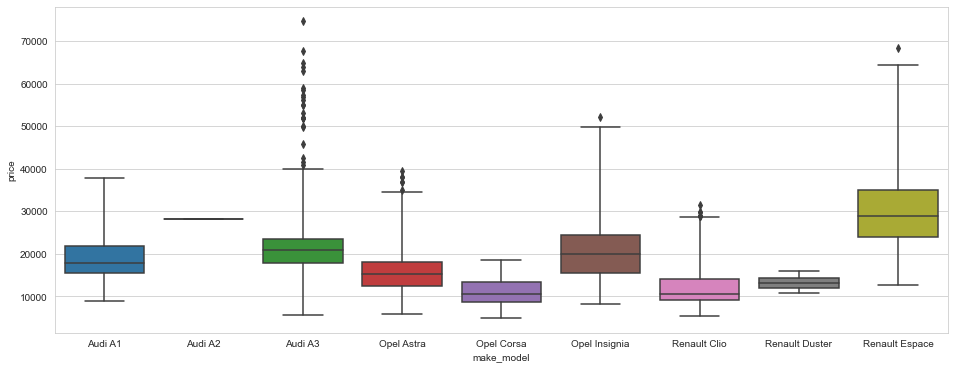

In [222]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

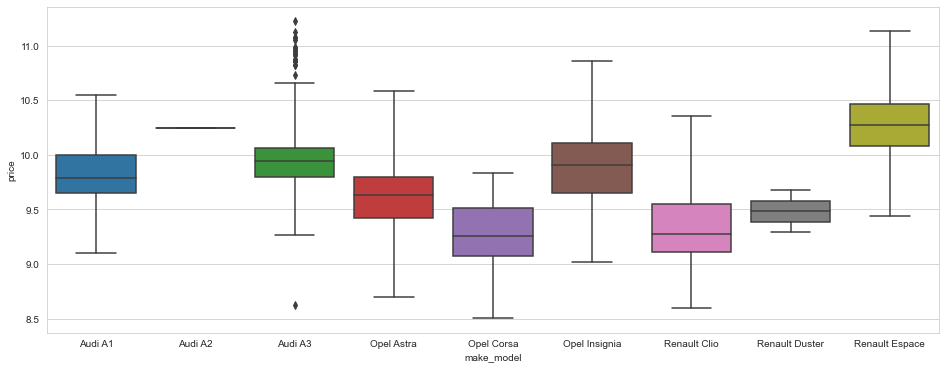

In [223]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=2.3)
plt.show()

make_model

In [224]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [225]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
2614,Audi A2,Off-Road,28200,26166.00,Employee's car,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.00,1.00,1.00,85.00,0,Metallic,Cloth,Manual,1598.00,1135.00,front,4.90,117.00


In [226]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [227]:
df.drop(drop_index, axis=0, inplace=True)

In [228]:
df.shape

(15914, 23)

Fuel

In [229]:
first_looking("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64


In [230]:
df[df.Fuel == "Electric"][["make_model", "body_type", "CO2_Emission", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,CO2_Emission,Gears,hp_kW,cons_comb,price
3356,Audi A3,Compact,36.00,6.00,150.00,4.10,24950
3612,Audi A3,Sedans,36.00,6.00,110.00,4.00,38450
3615,Audi A3,Sedans,36.00,6.00,110.00,4.00,35899
3617,Audi A3,Sedans,36.00,6.00,110.00,4.00,38000
13397,Renault Clio,Sedans,36.00,6.00,55.00,5.00,8490


In [231]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [232]:
df.drop(drop_index, axis=0, inplace=True)

In [233]:
df.reset_index(drop=True, inplace=True)

In [234]:
df.shape

(15909, 23)

FINAL STEP

In [235]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
km,56013.00,80000.00,83450.00
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer"
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D..."


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [237]:
df_num = df.select_dtypes("number")
df_num

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.00,7.00,3.00,2.00,66.00,1,1422.00,1220.00,3.80,99.00
1,14500,80000.00,7.00,2.00,1.00,141.00,0,1798.00,1255.00,5.60,129.00
2,14640,83450.00,7.00,3.00,1.00,85.00,0,1598.00,1135.00,3.80,99.00
3,14500,73000.00,6.00,3.00,1.00,66.00,0,1422.00,1195.00,3.80,99.00
4,16790,16200.00,7.00,3.00,1.00,66.00,1,1422.00,1135.00,4.10,109.00
...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1647.36,6.00,0.00,1.00,147.00,0,1997.00,1758.00,5.30,139.00
15905,39885,9900.00,7.00,0.00,1.00,165.00,0,1798.00,1708.00,7.40,168.00
15906,39875,15.00,6.00,0.00,1.00,146.00,1,1997.00,1734.00,5.30,139.00
15907,39700,10.00,6.00,0.00,1.00,147.00,0,1997.00,1758.00,5.30,139.00


<AxesSubplot:>

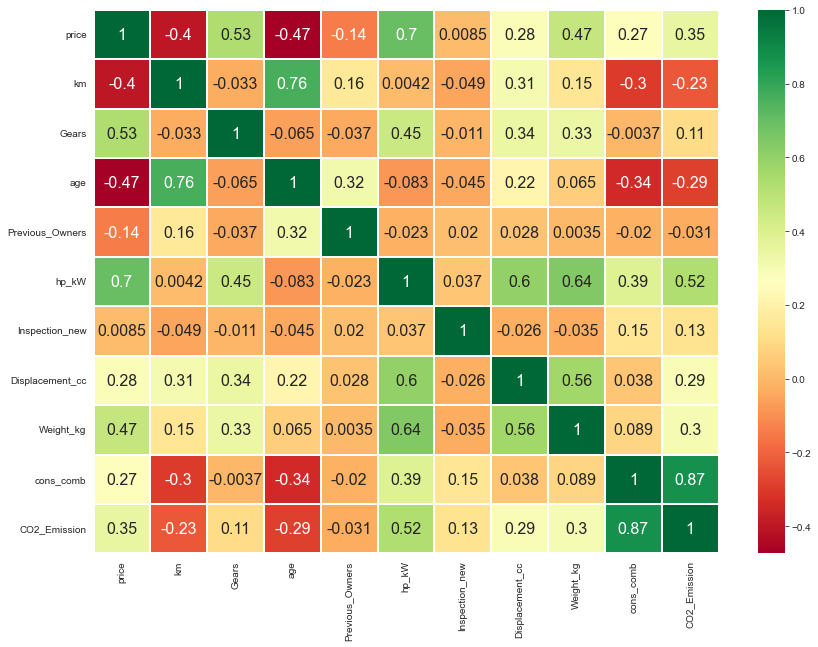

In [238]:
plt.figure(figsize = (14,10))
sns.heatmap(df_num.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

In [239]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'    #kuvvetli iliski var
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.399443,0.530563,-0.473689,-0.144672,0.696487,0.008508,0.282075,0.468264,0.273043,0.347668
km,-0.399443,1.000000,-0.033087,0.758370,0.157039,0.004206,-0.049485,0.306792,0.147246,-0.300284,-0.227640
Gears,0.530563,-0.033087,1.000000,-0.064507,-0.036594,0.449571,-0.011026,0.339431,0.334002,-0.003731,0.106674
age,-0.473689,0.758370,-0.064507,1.000000,0.316166,-0.083391,-0.045467,0.215304,0.065081,-0.341393,-0.288236
Previous_Owners,-0.144672,0.157039,-0.036594,0.316166,1.000000,-0.022559,0.019519,0.027961,0.003460,-0.020202,-0.030866
hp_kW,0.696487,0.004206,0.449571,-0.083391,-0.022559,1.000000,0.036782,0.597721,0.638280,0.389460,0.522893
Inspection_new,0.008508,-0.049485,-0.011026,-0.045467,0.019519,0.036782,1.000000,-0.025975,-0.035456,0.147715,0.134247
Displacement_cc,0.282075,0.306792,0.339431,0.215304,0.027961,0.597721,-0.025975,1.000000,0.563594,0.037786,0.288515
Weight_kg,0.468264,0.147246,0.334002,0.065081,0.003460,0.638280,-0.035456,0.563594,1.000000,0.089214,0.298414
cons_comb,0.273043,-0.300284,-0.003731,-0.341393,-0.020202,0.389460,0.147715,0.037786,0.089214,1.000000,0.869916


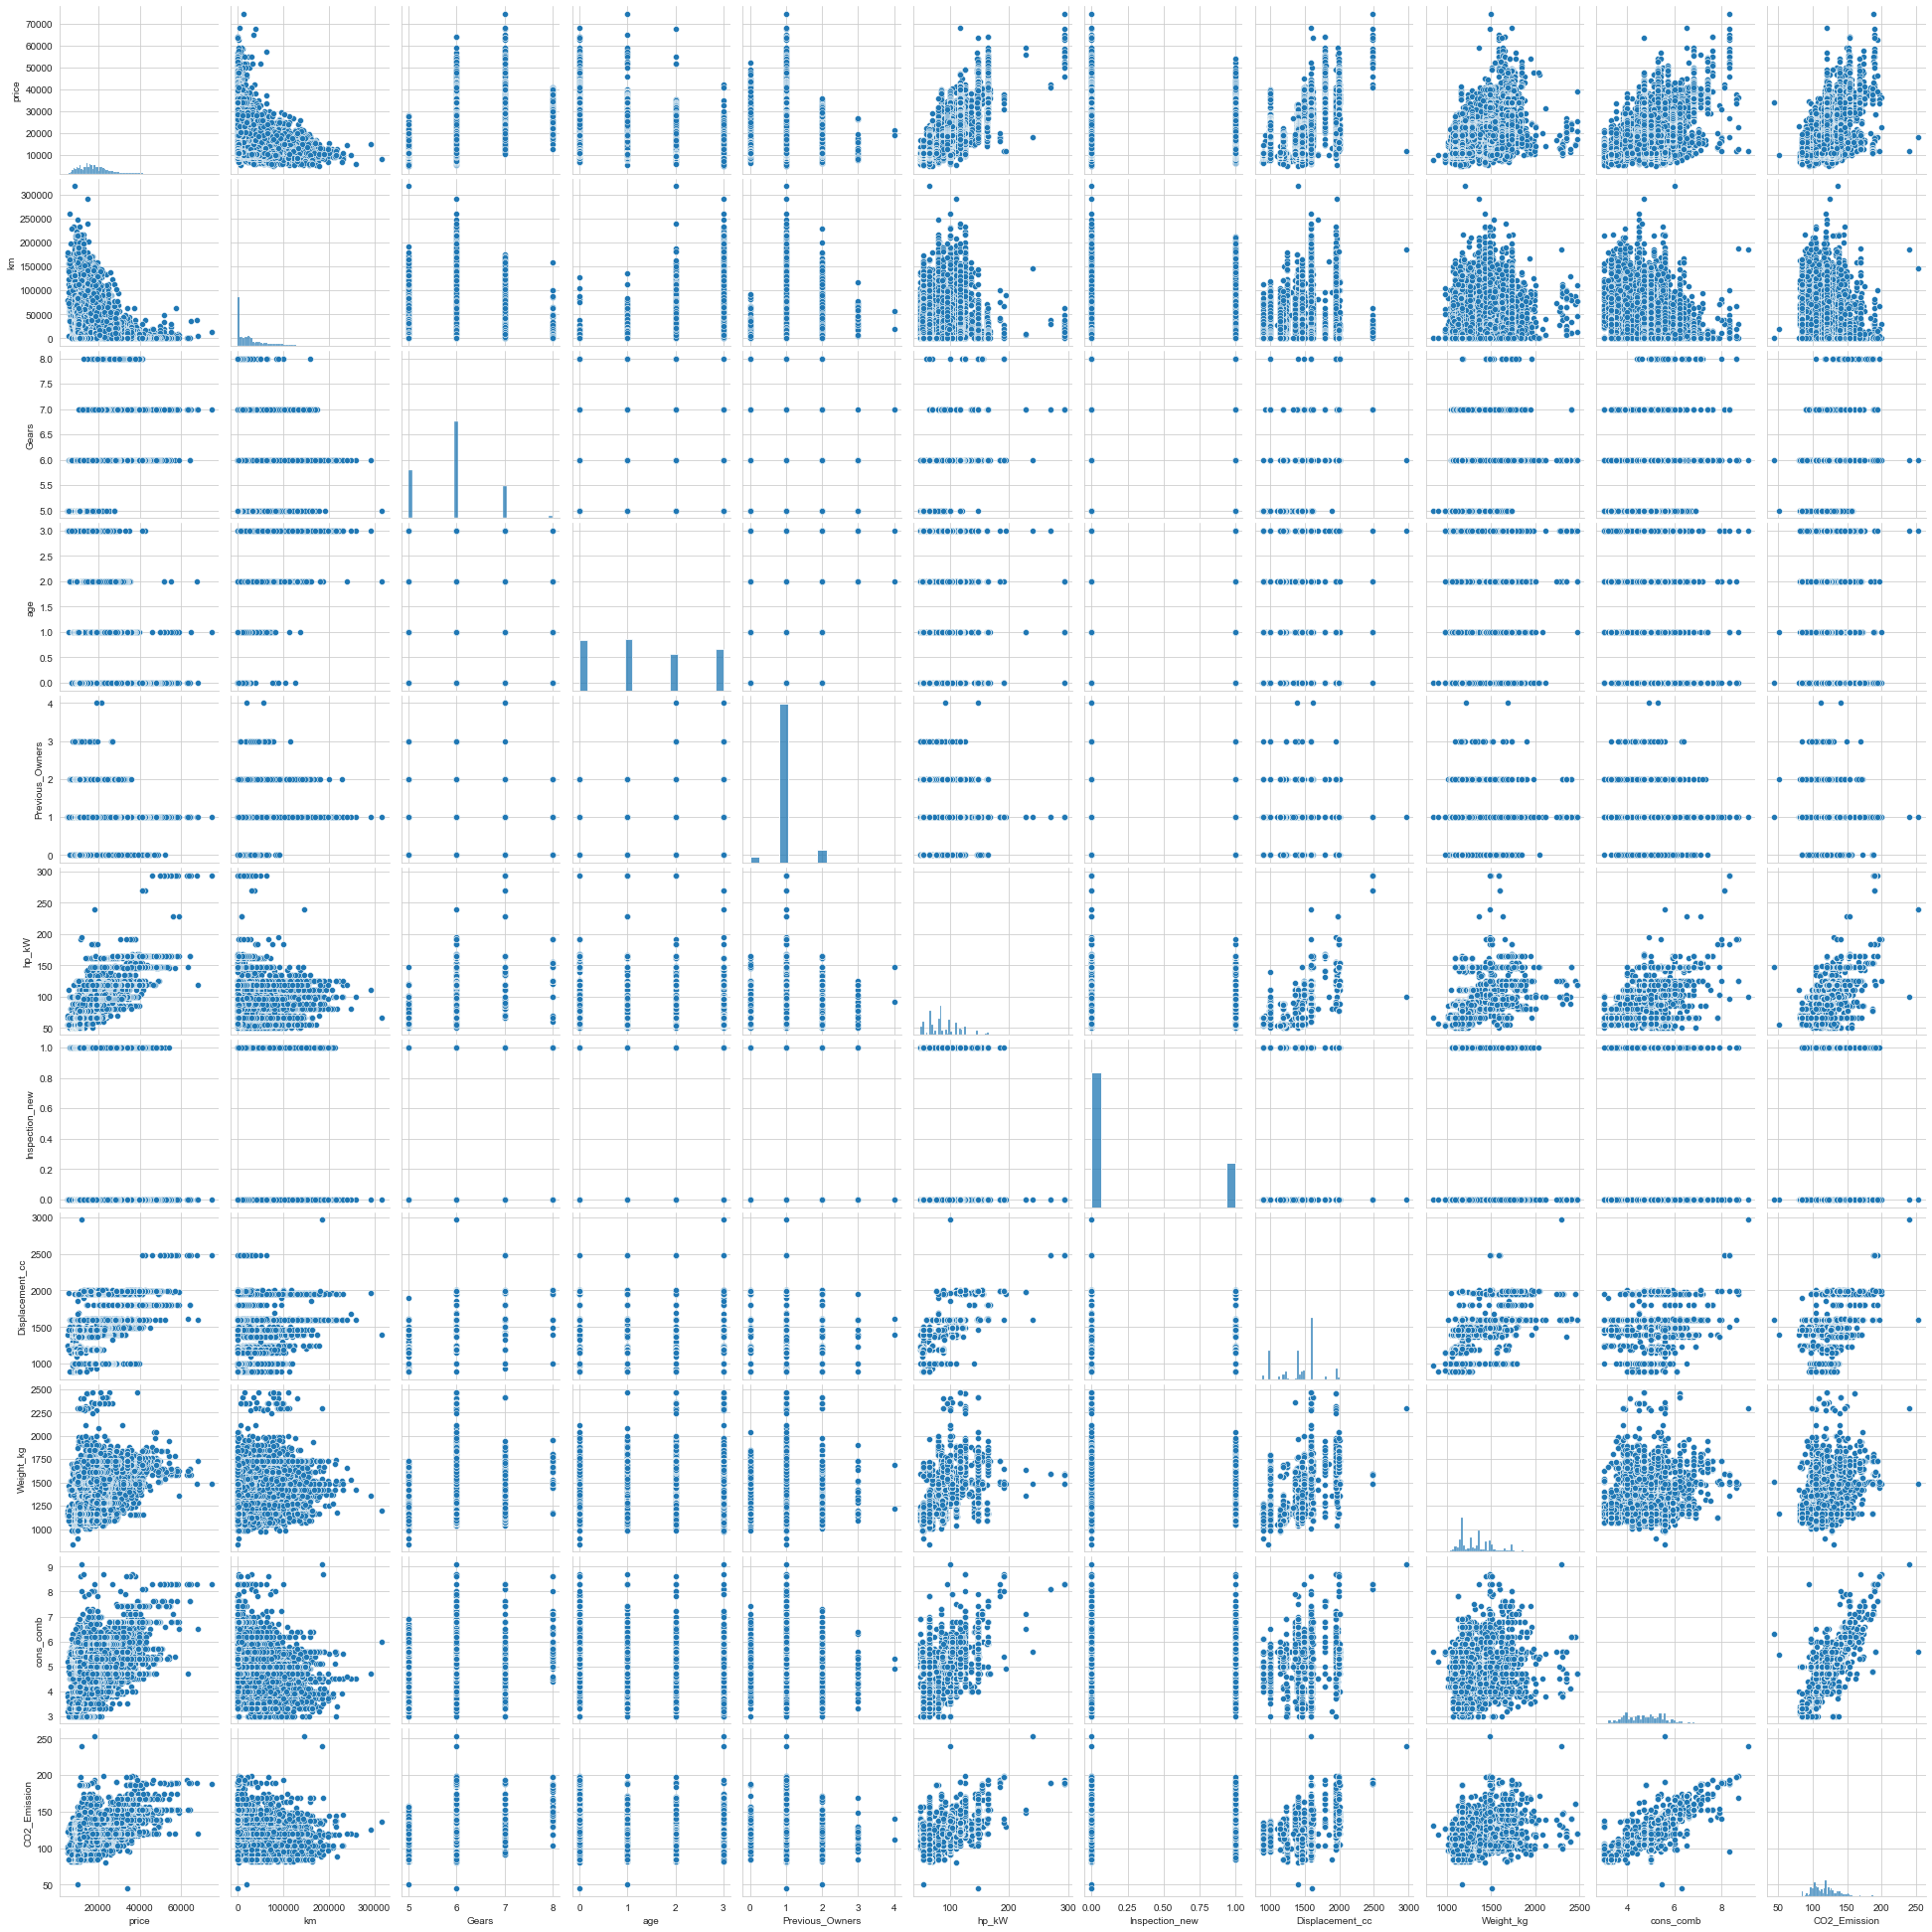

In [240]:
sns.pairplot(df_num, size=2.5);

Dummy_Operation

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [242]:
df.shape

(15909, 23)

1.Body tipine göre ortalama aracin km si nedir?

2.Vitese göre fiyat degisimi var mi?

3.Yakit tipine göre fiyat farki var mi?

4.Satilan araclarin model olarak hangisi en cok satiliyor?(Audi3 en cok satan araclardan)

5.Body tipine ve modele göre göre tüketim durumu nedir?

6.Make modele göre en yüksek ve en düsük fiyatlari nedir?(min opel corsa,max Audi)

7.Araclarin satis fiyatlarinin ortalamasi nedir?(Opel corsaya bakildi)

8.Body tipine göre min,max ve avg nedir?(make_model ve body_type a göre)

9.Fiyatlari 5000-10000 arasindaki arac markalarina bakilabilir

10.Piyasada olan en cok tercih edilenlerin rengi nedir?(Sedan olarak A3)Metalik cok tercih ediliyor

In [243]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [244]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [245]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], axis=1, inplace=True)

In [246]:
df.shape

(15909, 113)

In [247]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.00,80000.00,83450.00,73000.00,16200.00
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Gears,7.00,7.00,7.00,6.00,7.00
age,3.00,2.00,3.00,3.00,3.00
Previous_Owners,2.00,1.00,1.00,1.00,1.00
hp_kW,66.00,141.00,85.00,66.00,66.00


In [248]:
df_final = pd.get_dummies(df, drop_first=True)

In [249]:
df_final.shape

(15909, 132)

In [250]:
df_final.head().T

,0,1,2,3,4
price,15770.00,14500.00,14640.00,14500.00,16790.00
km,56013.00,80000.00,83450.00,73000.00,16200.00
Gears,7.00,7.00,7.00,6.00,7.00
age,3.00,2.00,3.00,3.00,3.00
Previous_Owners,2.00,1.00,1.00,1.00,1.00
hp_kW,66.00,141.00,85.00,66.00,66.00
Inspection_new,1.00,0.00,0.00,0.00,1.00
Displacement_cc,1422.00,1798.00,1598.00,1422.00,1422.00
Weight_kg,1220.00,1255.00,1135.00,1195.00,1135.00
cons_comb,3.80,5.60,3.80,3.80,4.10


In [251]:
df_final.to_csv("final_scout_dummy.csv", index=False)